In [2]:
%pip install torch

  Using cached torch-2.7.0-cp39-cp39-win_amd64.whl.metadata (29 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-3.0.2-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
Using cached torch-2.7.0-cp39-cp39-win_amd64.whl (212.4 MB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached MarkupSafe-3.0.2-cp39-cp39-win_amd64.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show qiskit-machine-learning

Name: qiskit-machine-learningNote: you may need to restart the kernel to use updated packages.

Version: 0.8.2
Summary: Qiskit Machine Learning: A library of quantum computing machine learning experiments
Home-page: https://github.com/qiskit-community/qiskit-machine-learning
Author: Qiskit Machine Learning Development Team
Author-email: qiskit@us.ibm.com
License: Apache-2.0
Location: c:\users\owais\miniconda3\lib\site-packages
Requires: dill, numpy, psutil, qiskit, scikit-learn, scipy, setuptools
Required-by: 


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score

# Import your quantum-related modules as before if running the hybrid model
from math import pi
from qiskit.circuit.library import QFT
from qiskit.providers.fake_provider import GenericBackendV2, generic_backend_v2
generic_backend_v2._NOISE_DEFAULTS["cx"] = (5.99988e-06, 6.99988e-06, 1e-5, 5e-3)

from qiskit import transpile, QuantumCircuit
from qiskit.circuit import Gate
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import CouplingMap, StagedPassManager, PassManager, AnalysisPass, TransformationPass
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.common import generate_unroll_3q, generate_embed_passmanager
from qiskit.quantum_info import hellinger_fidelity
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.dagcircuit import DAGCircuit
from qiskit_ibm_runtime.fake_provider import FakeTorino

# Transpiler Passes
## Layout passes
from qiskit.transpiler.passes.layout.csp_layout import CSPLayout
from qiskit.transpiler.passes.layout.dense_layout import DenseLayout
from qiskit.transpiler.passes.layout.sabre_layout import SabreLayout
from qiskit.transpiler.passes.layout.vf2_layout import VF2Layout
from qiskit.transpiler.passes.layout.trivial_layout import TrivialLayout

## Routing passes
from qiskit.transpiler.passes.routing.basic_swap import BasicSwap
from qiskit.transpiler.passes.routing.lookahead_swap import LookaheadSwap
from qiskit.transpiler.passes.routing.sabre_swap import SabreSwap
from qiskit.transpiler.passes.routing.stochastic_swap import StochasticSwap
from qiskit.transpiler.passes.routing.star_prerouting import StarPreRouting

## Synthesis passes (passes for the translation stage)
from qiskit.circuit import SessionEquivalenceLibrary
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary
from qiskit.transpiler.passes.basis.basis_translator import BasisTranslator
from qiskit.transpiler.passes.synthesis.high_level_synthesis import HighLevelSynthesis
### The next pass could also be considered an optimization pass.
from qiskit.transpiler.passes.synthesis.unitary_synthesis import UnitarySynthesis

## Optimization passes
from qiskit.transpiler.passes.optimization.collect_1q_runs import Collect1qRuns
from qiskit.transpiler.passes.optimization.collect_2q_blocks import Collect2qBlocks
from qiskit.transpiler.passes.optimization.consolidate_blocks import ConsolidateBlocks
from qiskit.transpiler.passes.optimization.optimize_1q_gates import Optimize1qGates
from qiskit.transpiler.passes.optimization.commutative_cancellation import CommutativeCancellation
from qiskit.transpiler.passes.optimization.cx_cancellation import CXCancellation
from qiskit_machine_learning.algorithms import QSVC
#from qiskit_machine_learning.kernels import QuantumKernel
#from qiskit.primitives import StatevectorSampler as Sampler
#from qiskit_machine_learning.gradients import ParamShiftEstimatorGradient
#from qiskit_machine_learning.neural_networks import EstimatorQNN
#from qiskit_machine_learning.neural_networks import CircuitQNN
#from qiskit_machine_learning.neural_networks import SamplerQNN
#from qiskit_machine_learning.utils import split_dataset_to_data_and_labels
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit.primitives import Sampler
from qiskit_machine_learning.gradients import ParamShiftEstimatorGradient
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.neural_networks import SamplerQNN
#from qiskit_machine_learning.datasets import ad_hoc_data

## Import with pandas

In [2]:
import pandas as pd

train_df = pd.read_csv('Datasets/drug+induced+autoimmunity+prediction/DIA_trainingset_RDKit_descriptors.csv')

# import the training file
train_df.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('Datasets/drug+induced+autoimmunity+prediction/DIA_testset_RDKit_descriptors.csv')
# import the test file
test_df.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,...,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,...,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@H]...,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,...,0,0,0,0,0,0,0,0,0,0
3,1,NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,...,0,0,0,0,0,0,0,0,0,0
4,0,COc1cc2c(CCN[C@]23CS[C@@H]4[C@@H]5[C@@H]6N(C)[...,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,...,1,0,0,0,0,0,0,0,0,0


In [4]:
# Check the shape of the data
print("Train shape: ", train_df.shape)
print("Test shape: ", test_df.shape)

Train shape:  (477, 198)
Test shape:  (120, 198)


In [5]:
# import the chemical descriptor file
chemdes_df = pd.read_excel("Datasets/drug+induced+autoimmunity+prediction/RDKit_ChemDes.xlsx")
chemdes_df.head()

,Index,Descriptor Name,Type,Description,Dimention,Extended class
0,1,BalabanJ,Balaban's J index,"Balaban's J value for a molecule,Chem. Phys. L...",2,Topological descriptors
1,2,BertzCT,BertzCT,"A topological index meant to quantify ""complex...",2,Topological descriptors
2,3,Chi0,Chi indices,"From equations (1),(9) and (10) of Rev. Comp. ...",2,Connectivity descriptors
3,4,Chi1,Chi indices,"From equations (1),(11) and (12) of Rev. Comp....",2,Connectivity descriptors
4,5,Chi0v,Chi indices,"From equations (5),(9) and (10) of Rev. Comp. ...",2,Connectivity descriptors


We observe that in the three files, we have

`DIA Training & Test Sets: Both sets of data have a label, chemical compounds in the SMILES notation, and 196 different molecular descriptors`

`RDKit Chemistry Descriptor: The descriptor names and the type of descriptors found in the dataset`

### Missing Data

In [6]:
# get amount of missing data
print("Total of Missing train data:", train_df.isnull().sum().sum())
print("Total of Missing test data:", test_df.isnull().sum().sum())

Total of Missing train data: 0
Total of Missing test data: 0


In [7]:
train_df.describe()

,Label,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000
mean,0.247379,2.142618,738.629776,18.130015,14.372379,14.886985,11.874170,8.433990,8.963610,6.672302,...,0.054507,0.050314,0.014675,0.006289,0.008386,0.031447,0.0,0.027254,0.327044,0.027254
std,0.431942,0.710916,392.967592,7.247300,6.093945,6.134658,4.828675,3.756045,3.813948,3.282600,...,0.245047,0.245944,0.120375,0.079138,0.091285,0.186342,0.0,0.175409,1.372740,0.162993
min,0.000000,0.986000,8.000000,3.414000,1.725000,1.725000,1.732000,0.612000,0.612000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.679000,493.255000,13.405000,10.391000,10.763000,8.724000,5.807000,6.340000,4.399000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,1.964000,712.423000,17.646000,14.184000,14.683000,11.770000,8.351000,8.997000,6.362000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,2.419000,943.190000,22.052000,17.730000,18.216000,14.507000,10.588000,11.128000,8.554000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,5.083000,2430.934000,50.120000,38.475000,39.837000,31.516000,23.166000,24.440000,19.352000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,2.000000,18.000000,1.000000


In [8]:
test_df.describe()

,Label,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.0,120.000000,120.000000,120.000000
mean,0.250000,2.145058,805.967508,19.685075,15.659142,16.107367,12.853417,9.127392,9.525583,7.308517,...,0.075000,0.008333,0.008333,0.016667,0.02500,0.008333,0.0,0.033333,0.358333,0.016667
std,0.434828,0.778106,443.927519,7.660753,6.308209,6.407406,5.096673,3.834029,3.917699,3.441829,...,0.294558,0.091287,0.091287,0.128556,0.15678,0.091287,0.0,0.222035,1.268863,0.128556
min,0.000000,0.837000,2.000000,2.000000,0.908000,0.908000,1.000000,0.204000,0.204000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.675500,556.210750,15.267000,12.633750,12.853000,10.237000,7.363000,7.685750,5.608250,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,1.946000,740.543500,18.629500,15.223500,15.568000,12.194500,8.814000,9.257500,7.084500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.250000,2.353750,985.427000,23.656750,18.120000,18.533500,14.867000,10.832750,11.087750,8.987000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,5.079000,2629.395000,48.141000,41.328000,41.328000,32.350000,23.269000,23.269000,18.816000,...,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,2.000000,9.000000,1.000000


In [9]:
chemdes_df.describe()

,Index,Dimention
count,196.00000,196.000000
mean,98.50000,1.459184
std,56.72448,0.499607
min,1.00000,1.000000
25%,49.75000,1.000000
50%,98.50000,1.000000
75%,147.25000,2.000000
max,196.00000,2.000000


In [10]:
print(train_df.head())
print(train_df.dtypes)


   Label                                             SMILES  BalabanJ  \
0      0  COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...     1.821   
1      0                    C[C@H](N(O)C(=O)N)c1cc2ccccc2s1     2.363   
2      0                              C[N+](C)(C)CC(=O)[O-]     3.551   
3      1  CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...     2.076   
4      1           C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O     2.888   

    BertzCT    Chi0   Chi0n   Chi0v    Chi1  Chi1n  Chi1v  ...  fr_sulfide  \
0  1266.407  22.121  16.781  16.781  14.901  9.203  9.203  ...           0   
1   490.434  11.707   8.752   9.569   7.592  4.854  5.670  ...           0   
2    93.092   6.784   5.471   5.471   3.417  2.420  2.420  ...           0   
3  1053.003  21.836  16.995  16.995  14.274  9.926  9.926  ...           0   
4   549.823  14.629   9.746   9.746   8.752  5.040  5.040  ...           0   

   fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
0             0

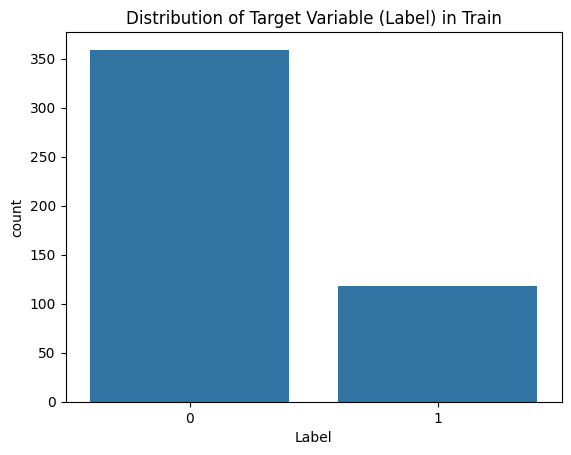

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the label assymetry
sns.countplot(x='Label', data=train_df)
plt.title("Distribution of Target Variable (Label) in Train")
plt.show()

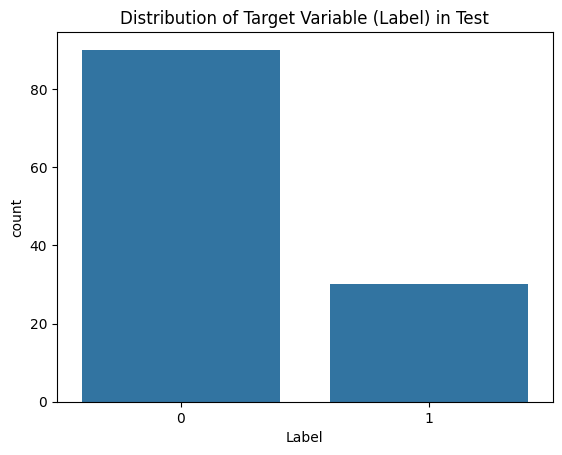

In [12]:
sns.countplot(x='Label', data=test_df)
plt.title("Distribution of Target Variable (Label) in Test")
plt.show()

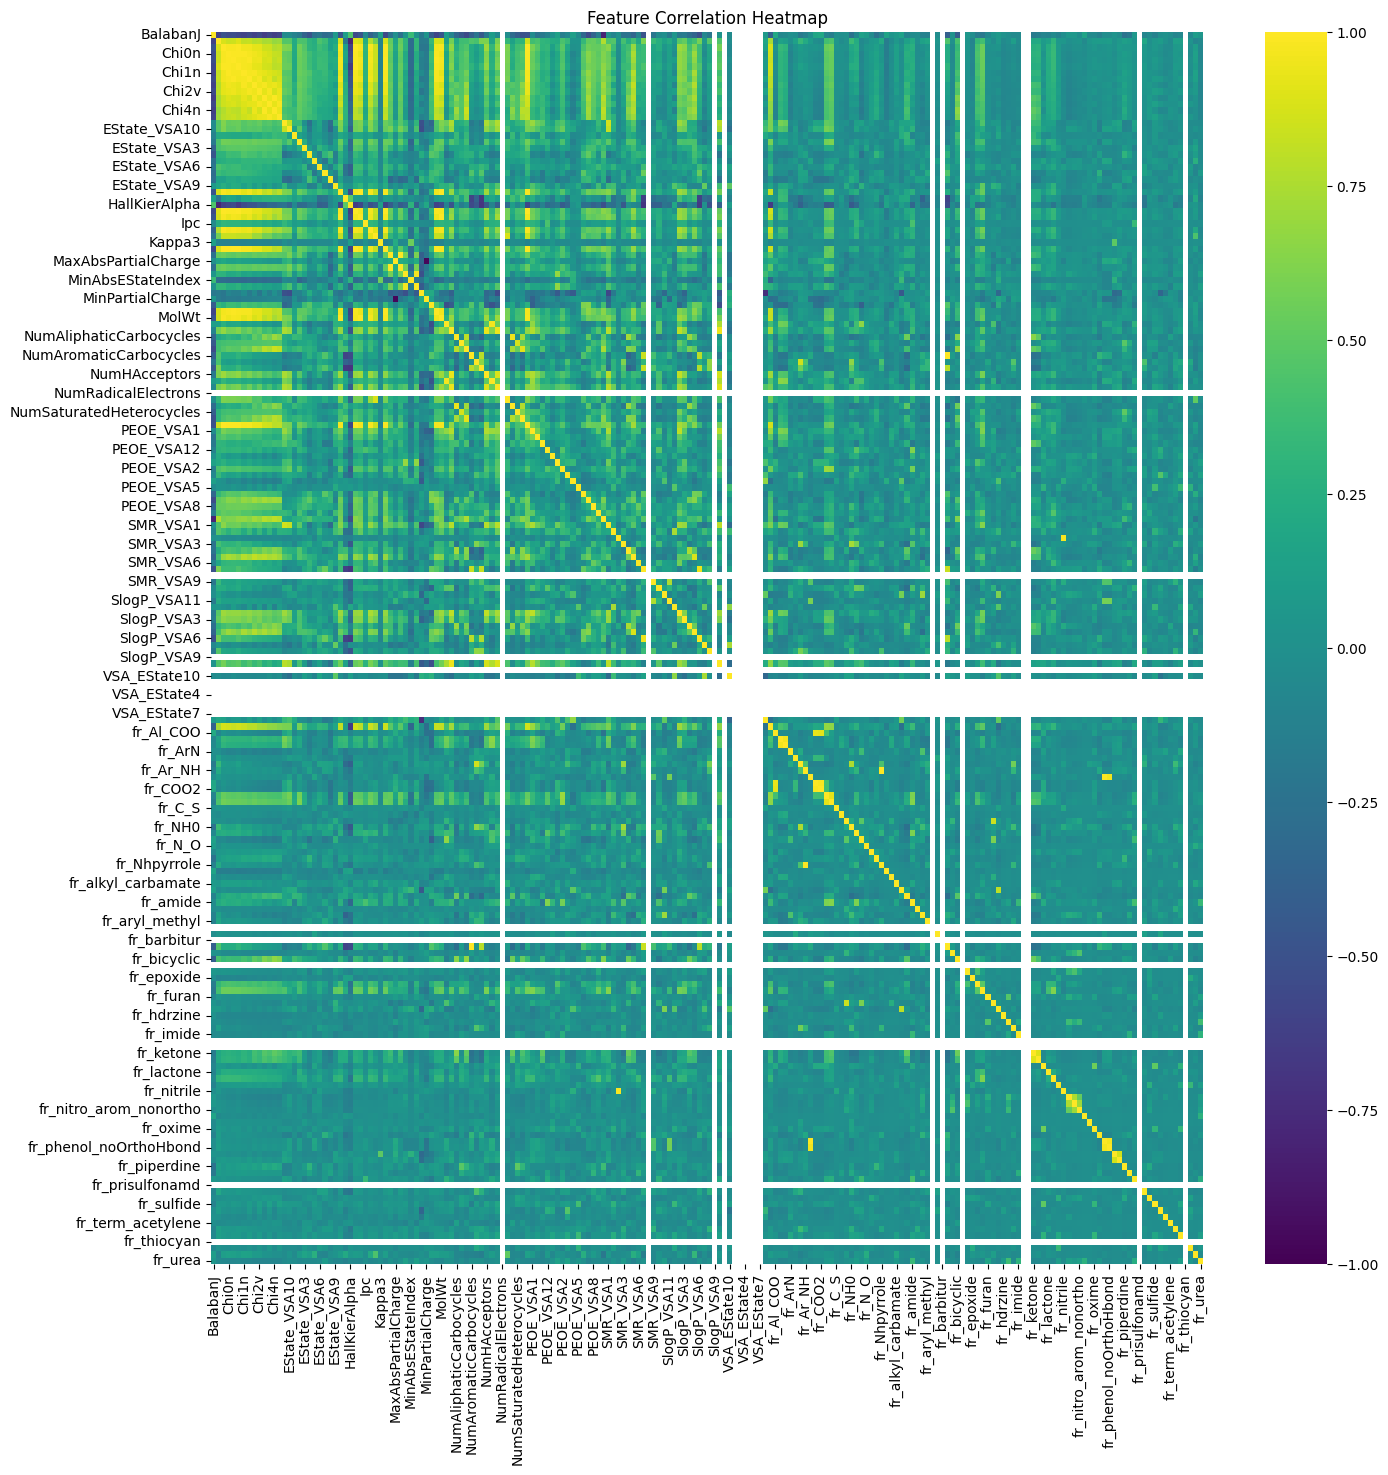

In [13]:
corr = train_df.iloc[:, 2:].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

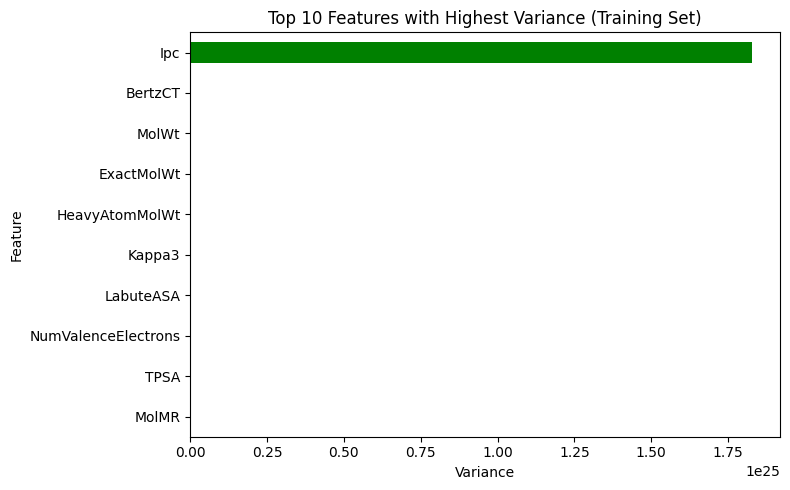

In [14]:
import matplotlib.pyplot as plt

# Calculate variance for all features except the first two columns (likely IDs/SMILES) and the label
feature_variances = train_df.iloc[:, 2:-1].var().sort_values(ascending=False)

# Select the 10 features with the highest variance
top10_features = feature_variances.head(10)

# Plot the variances
plt.figure(figsize=(8, 5))
top10_features.plot(kind='barh', color='green')
plt.title("Top 10 Features with Highest Variance (Training Set)")
plt.xlabel("Variance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

1. This code automatically finds and displays the 10 most variable features in your dataset.

2. Adjust the column slicing (2:-1) if your label column is named or positioned differently.

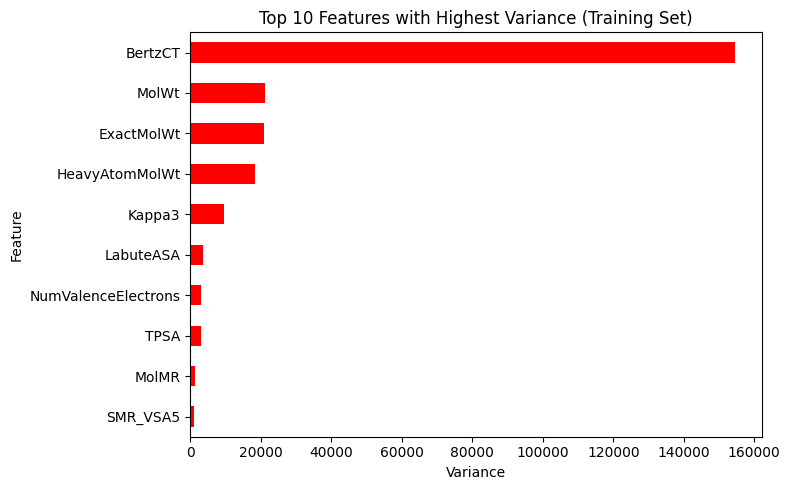

In [15]:
import matplotlib.pyplot as plt

# Calculate variance for all features except the first two columns (likely IDs/SMILES) and the label
feature_variances = train_df.iloc[:, 2:].var().sort_values(ascending=False)

# Select the 10 features with the highest variance
top10_features = feature_variances[1:11]

# Plot the variances
plt.figure(figsize=(8, 5))
top10_features.plot(kind='barh', color='red')
plt.title("Top 10 Features with Highest Variance (Training Set)")
plt.xlabel("Variance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import pandas as pd


# Remove non-numeric columns
X_train_set = train_df.drop(columns=['SMILES', 'ID', 'Name'], errors='ignore').iloc[:, :-1].values #X-train set
y_train_set = train_df.drop(columns=['SMILES', 'ID', 'Name'], errors='ignore').iloc[:, -1].values #y-train set
#X_test_set = test_df.drop(columns=['SMILES', 'ID', 'Name'], errors='ignore').iloc[:, :-1].values
#y_test_set = test_df.drop(columns=['SMILES', 'ID', 'Name'], errors='ignore').iloc[:, -1].values
#chemdes_df = chemdes_df.drop(columns=['SMILES', 'ID', 'Name'], errors='ignore').iloc[:, :-1].values 

# Check the shape of the data
print("Train shape: ", X_train_set.shape)
#print("Test shape: ", X_test_set.shape)
# Check the shape of the data
print("Train shape: ", y_train_set.shape)
#print("Test shape: ", y_test_set.shape)
# Check the shape of the data
#print("Train shape: ", chemdes_df.shape)

Train shape:  (477, 196)
Train shape:  (477,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_set, y_train_set, test_size=0.2, random_state=42
)

# Standard scaling (fit on train, transform train and valid)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [18]:
import numpy as np
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
from sklearn.decomposition import PCA

from qiskit.circuit import ParameterVector

## 3. PCA for quantum input
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

# 4. QNN (example with QSVC)
#from qiskit_machine_learning.algorithms import QSVC
#qsvc = QSVC(quantum_kernel=None) 

In [19]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

# Quantum components
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
sampler = StatevectorSampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# QSVC model
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train_pca, y_train)
y_pred = qsvc.predict(X_valid_pca)


In [20]:
# Basic metrics
acc = accuracy_score(y_valid, y_pred)
prec = precision_score(y_valid, y_pred, zero_division=0)
rec = recall_score(y_valid, y_pred, zero_division=0)
f1 = f1_score(y_valid, y_pred, zero_division=0)
roc = roc_auc_score(y_valid, qsvc.decision_function(X_valid_pca))

# Confusion matrix and classification report
cm = confusion_matrix(y_valid, y_pred)
report = classification_report(y_valid, y_pred, target_names=['Class 0', 'Class 1'])

# Print all results
print(f"\n🔍 QSVC Quantum Kernel Evaluation:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1-score       : {f1:.4f}")
print(f"ROC AUC        : {roc:.4f}")
print(f"\nConfusion Matrix:\n{cm}")
print("\nClassification Report:\n", report)



🔍 QSVC Quantum Kernel Evaluation:
Accuracy       : 0.9792
Precision      : 0.0000
Recall         : 0.0000
F1-score       : 0.0000
ROC AUC        : 0.1223

Confusion Matrix:
[[94  0]
 [ 2  0]]

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99        94
     Class 1       0.00      0.00      0.00         2

    accuracy                           0.98        96
   macro avg       0.49      0.50      0.49        96
weighted avg       0.96      0.98      0.97        96



c:\Users\Owais\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Owais\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Owais\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


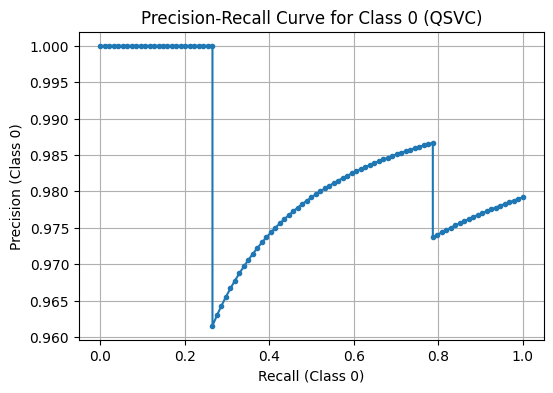

In [22]:
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Precision-Recall curve for class 0
y_scores = qsvc.decision_function(X_valid_pca)
precision, recall, _ = precision_recall_curve(y_valid, y_scores, pos_label=0)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Class 0)')
plt.ylabel('Precision (Class 0)')
plt.title('Precision-Recall Curve for Class 0 (QSVC)')
plt.grid(True)
plt.show()

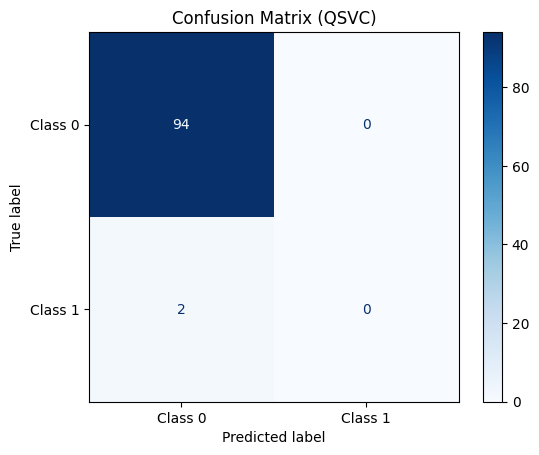

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for both classes
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.title('Confusion Matrix (QSVC)')
plt.show()

In [24]:
import numpy as np
from collections import Counter

# 1. Label distribution in validation set
print("Label distribution in y_valid:", dict(Counter(y_valid)))

# 2. Prediction distribution
print("Prediction distribution in y_pred:", dict(Counter(y_pred)))

# 3. Fraction of positive predictions
pos_frac = (y_pred == 1).mean()
print(f"Fraction of positive predictions: {pos_frac:.3f}")

# 4. If you have a sensitive attribute (e.g., 'Gender' or 'AgeGroup'), check group fairness:
# Example (uncomment and adapt if you have such a column):
# gender_valid = ... # e.g., test_df['Gender'].values or similar
# for group in np.unique(gender_valid):
#     idx = (gender_valid == group)
#     acc = accuracy_score(y_valid[idx], y_pred[idx])
#     print(f"Accuracy for Gender={group}: {acc:.3f}")

# 5. Demographic parity (if sensitive attribute available)
# for group in np.unique(gender_valid):
#     idx = (gender_valid == group)
#     pos_rate = (y_pred[idx] == 1).mean()
#     print(f"Positive prediction rate for Gender={group}: {pos_rate:.3f}")

Label distribution in y_valid: {np.int64(0): 94, np.int64(1): 2}
Prediction distribution in y_pred: {np.int64(0): 96}
Fraction of positive predictions: 0.000


1. Label and Prediction Distribution
Plot type: Bar plot (counts for each class)

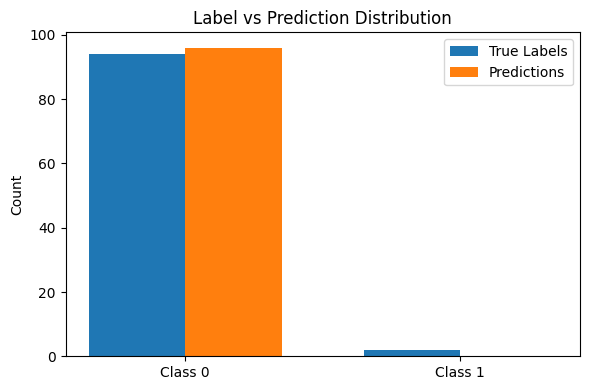

In [25]:
import matplotlib.pyplot as plt

labels = ['Class 0', 'Class 1']
label_counts = [np.sum(y_valid == 0), np.sum(y_valid == 1)]
pred_counts = [np.sum(y_pred == 0), np.sum(y_pred == 1)]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, label_counts, width, label='True Labels')
plt.bar(x + width/2, pred_counts, width, label='Predictions')
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Label vs Prediction Distribution')
plt.legend()
plt.tight_layout()
plt.show()

2. Fraction of Positive Predictions
Plot type: Simple bar plot or pie chart

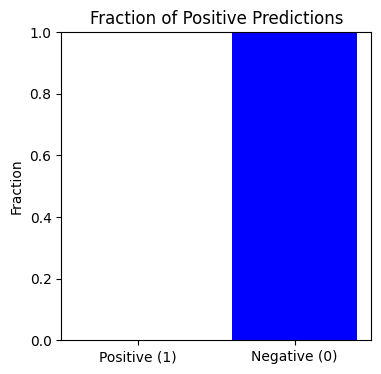

In [26]:
plt.figure(figsize=(4,4))
plt.bar(['Positive (1)', 'Negative (0)'], [pos_frac, 1-pos_frac], color=['orange', 'blue'])
plt.ylabel('Fraction')
plt.title('Fraction of Positive Predictions')
plt.ylim(0,1)
plt.show()

3. Group Fairness (if sensitive attribute available)
Plot type: Grouped bar plot (accuracy or positive rate per group)

In [27]:
# Example if you have gender_valid as a sensitive attribute
gender_valid = test_df['Gender'].values
group_acc = []
group_pos = []
groups = np.unique(gender_valid)
for group in groups:
    idx = (gender_valid == group)
    group_acc.append(accuracy_score(y_valid[idx], y_pred[idx]))
    group_pos.append((y_pred[idx] == 1).mean())
plt.figure(figsize=(6,4))
plt.bar(groups, group_acc, alpha=0.7, label='Accuracy')
plt.bar(groups, group_pos, alpha=0.7, label='Positive Rate')
plt.ylabel('Score')
plt.title('Group Fairness Metrics')
plt.legend()
plt.show()

KeyError: 'Gender'